# Final Machine Learning Project

## Student - Clinton Brodar
## Instructor - Dr. Uma Gajendragadkar

### Problem - Develop a ML model to predict the effect of music on mental health

### Dataset source - https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

This dataset consists of 736 observations & 33 numerical independent variables.
Dependent and target variable is `Music effects`.

#### Music effects
`Improve      542`
`No effect    169`
`Worsen        17`

Because there are so few rows with Worsen, these will be merged with No effect and that new value will become No Improve.

#### Column Descriptions

Timestamp - Date and time when form was submitted

Age - Respondent's age

Primary streaming service - Respondent's primary streaming service

Hours per day - Number of hours the respondent listens to music per day

While working - Does the respondent listen to music while studying/working?

Instrumentalist - Does the respondent play an instrument regularly?

Composer - Does the respondent compose music?

Fav genre - Respondent's favorite or top genre

Exploratory - Does the respondent actively explore new artists/genres?

Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

BPM - Typical speed of music the listener listens to

Anxiety - Scale of listener anxiety level (0 - 9)

Depression - Scale of listener depression level (0 - 9)

Insomnia - Scale of listener insomnia level (0 - 9)

OCD - Scale of listener OCD level (0 - 9)

Music effects - Class variable

In [2]:
!pip install imblearn

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

# Import Data

In [5]:
data = pd.read_csv("dataset.csv")
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
target_variable = 'Music effects'

# Data Exploration

In [8]:
data.shape

(736, 33)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [10]:
data[target_variable]

0            NaN
1            NaN
2      No effect
3        Improve
4        Improve
         ...    
731      Improve
732      Improve
733      Improve
734      Improve
735      Improve
Name: Music effects, Length: 736, dtype: object

In [11]:
data[target_variable].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

<Axes: xlabel='Music effects'>

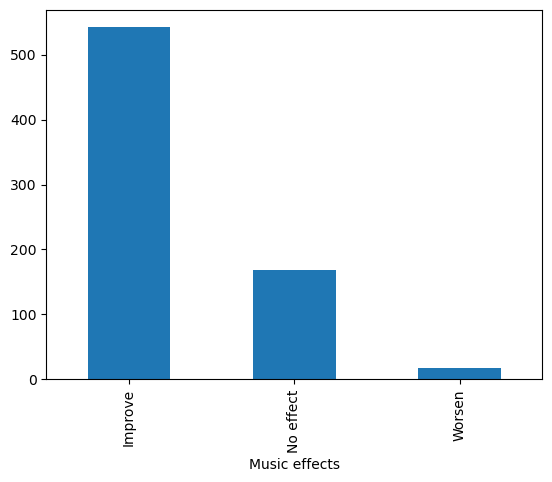

In [12]:
data[target_variable].value_counts().plot(kind='bar')

In [13]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Timestamp', 'Music effects', 'Permissions']]

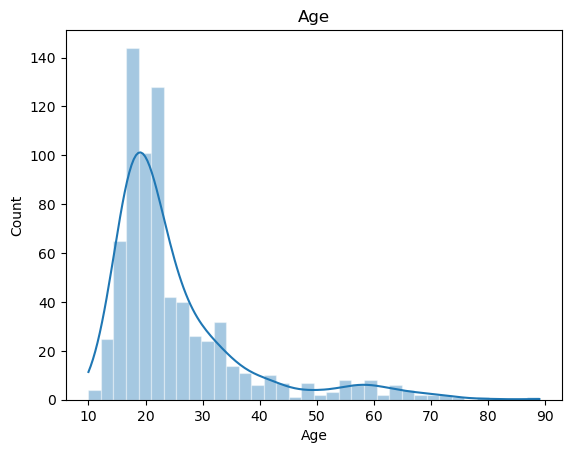

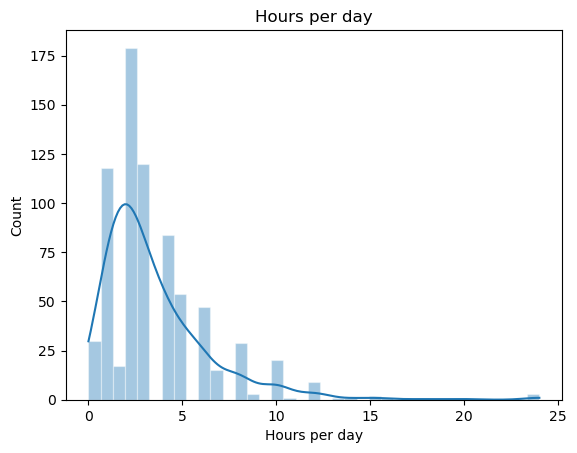

In [14]:
for col in numerical_cols:
    col_data = data[col].dropna()
    sns.histplot(col_data, kde=True, alpha=.4, edgecolor=(1, 1, 1, .4))
    plt.title(col)
    plt.show()

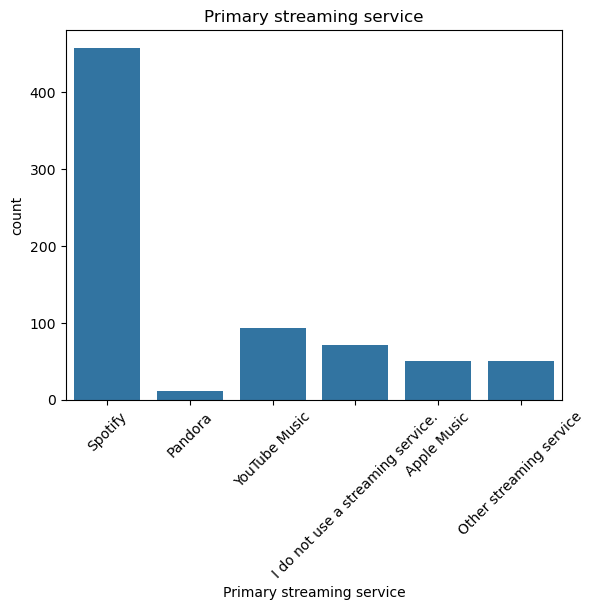

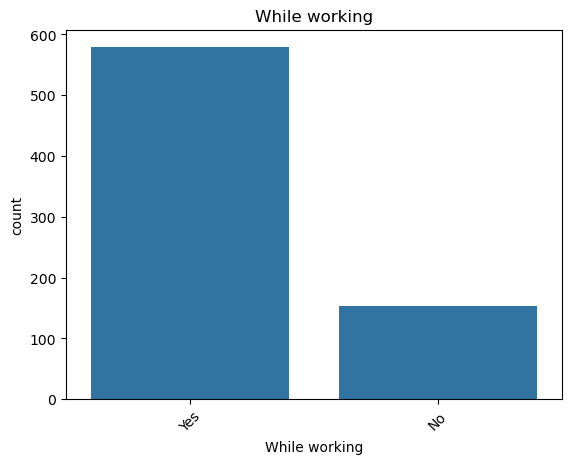

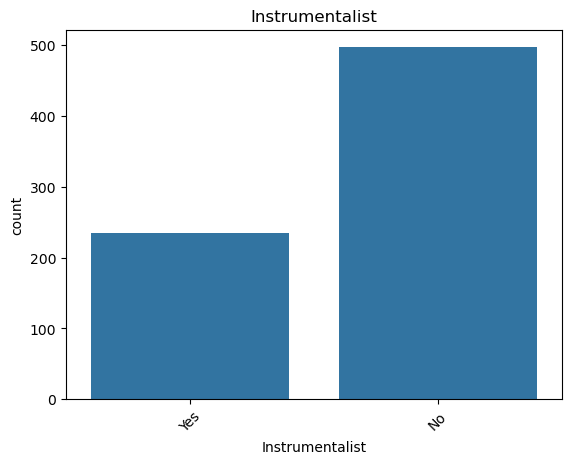

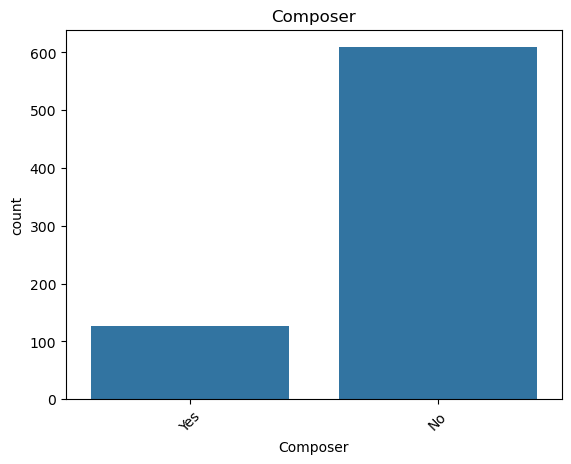

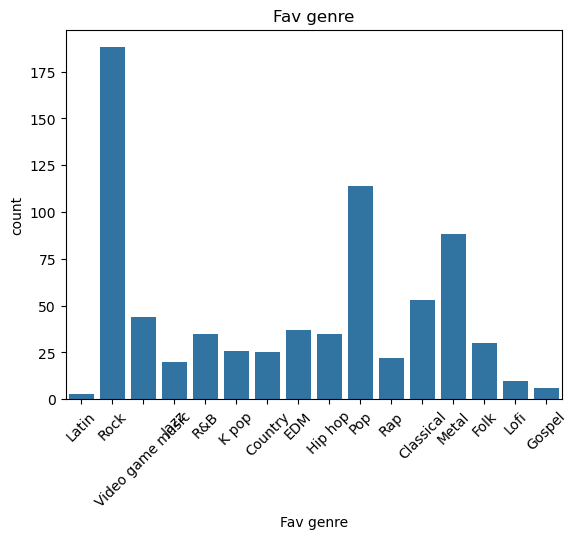

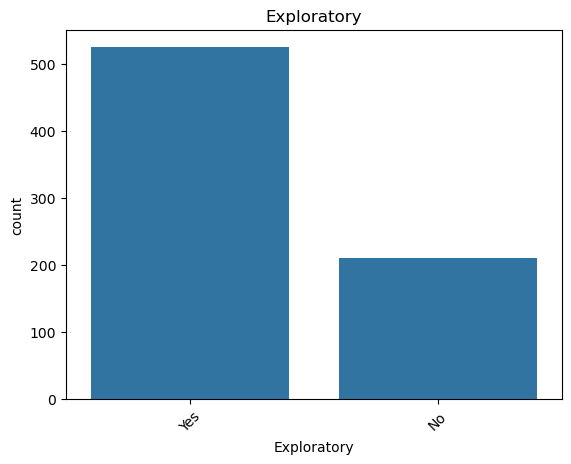

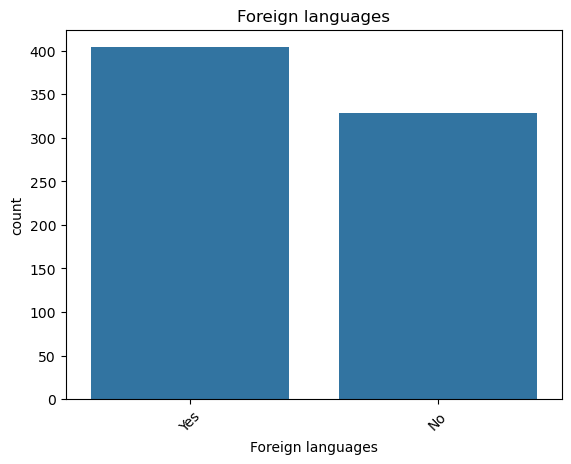

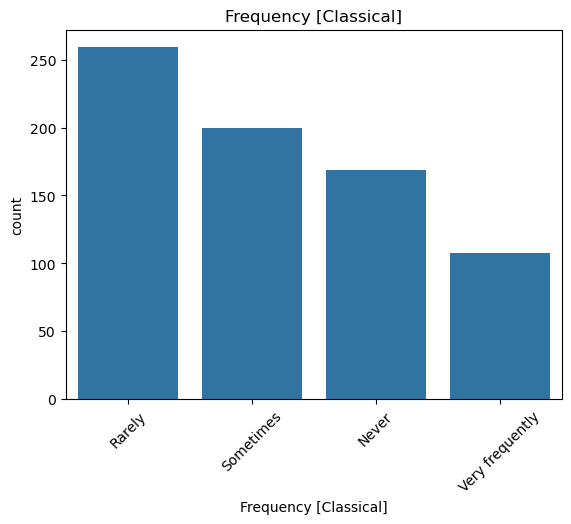

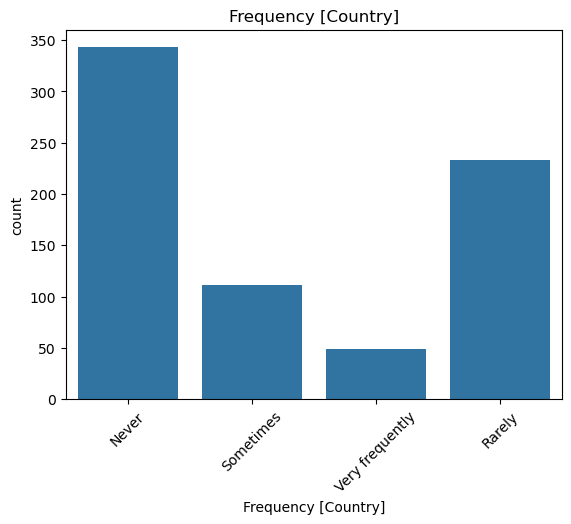

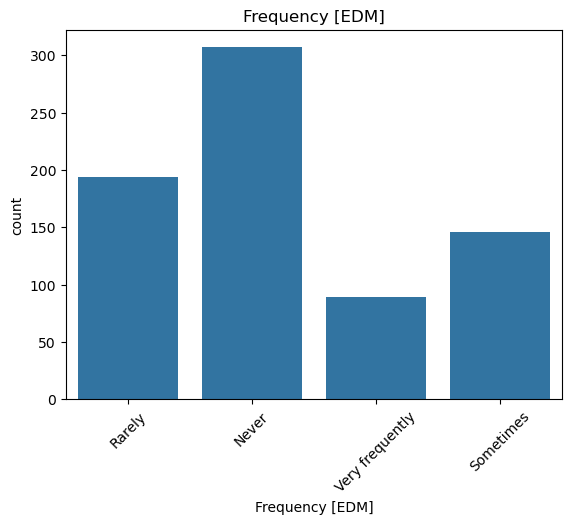

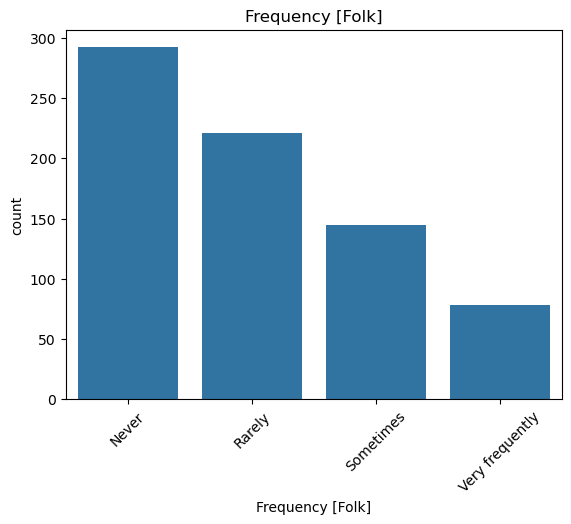

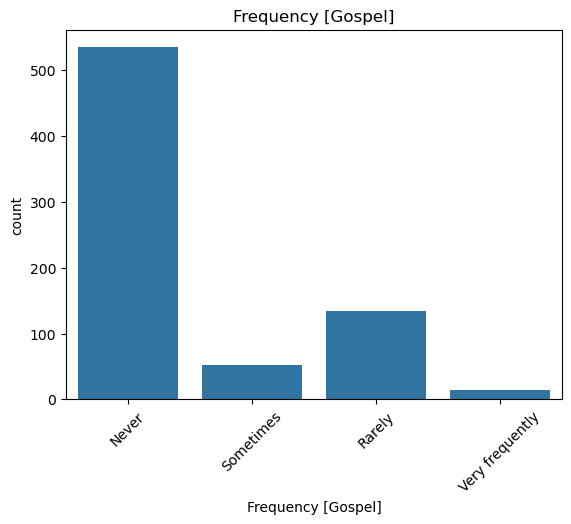

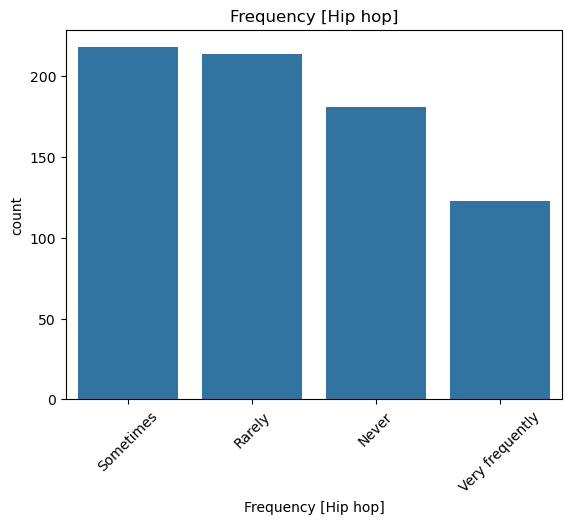

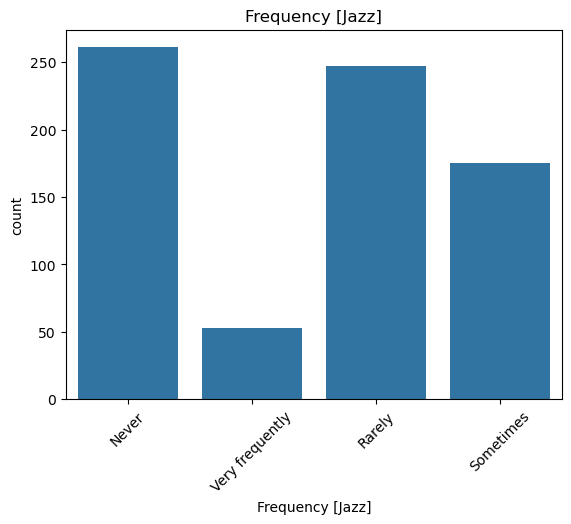

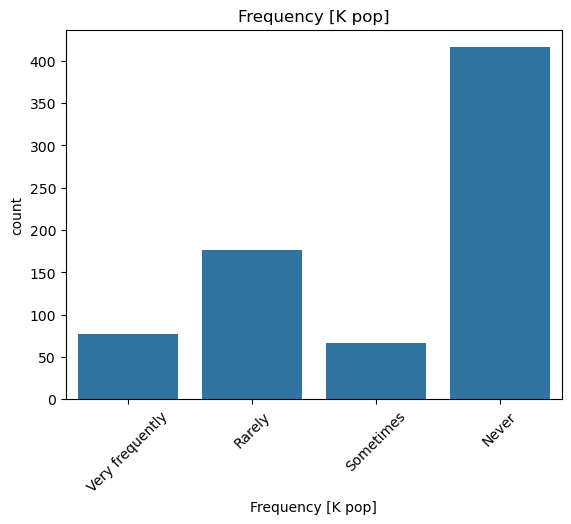

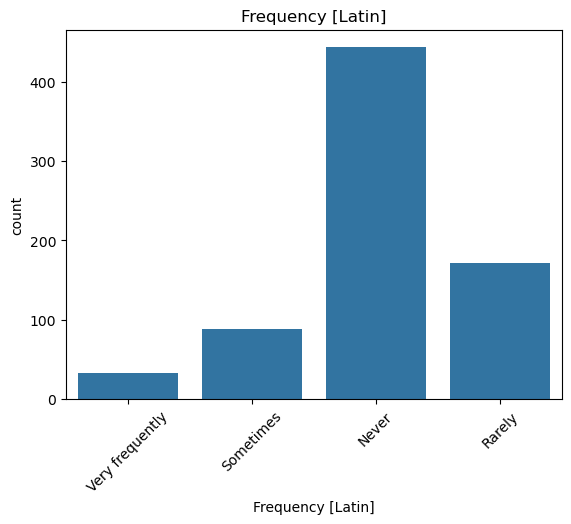

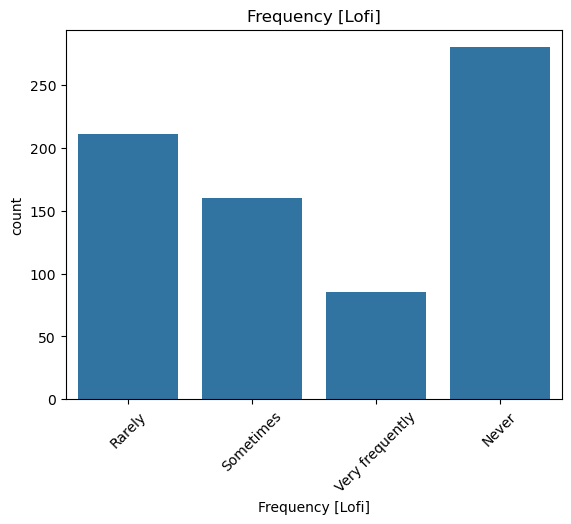

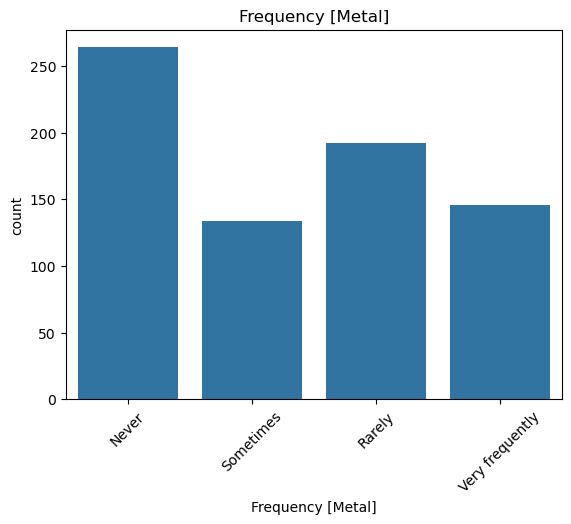

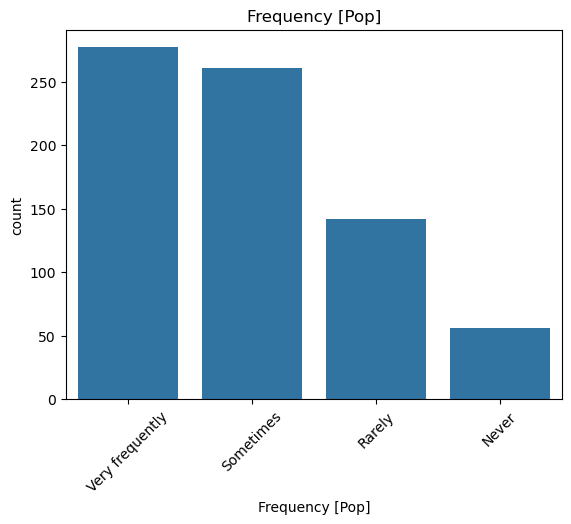

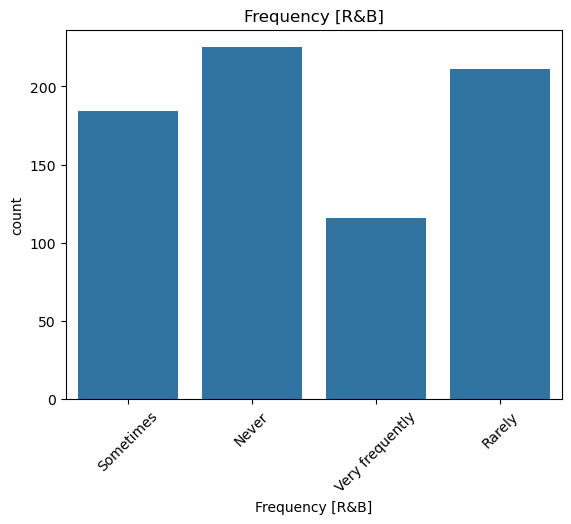

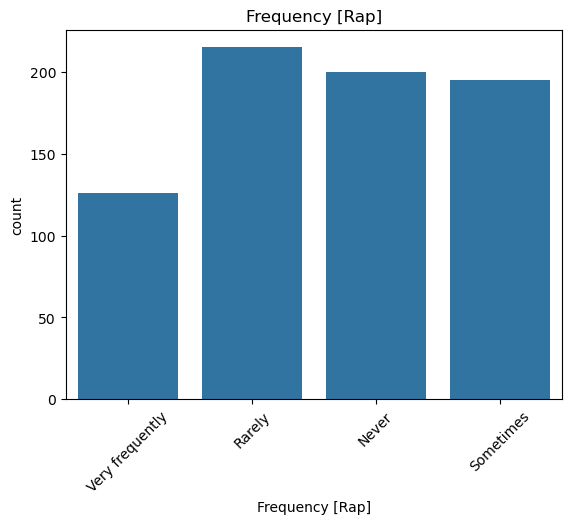

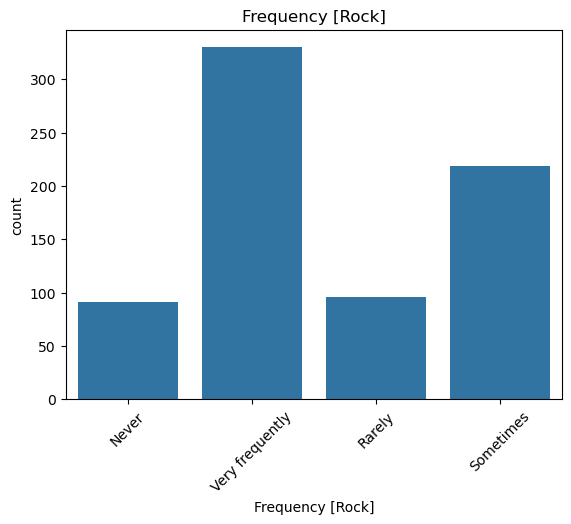

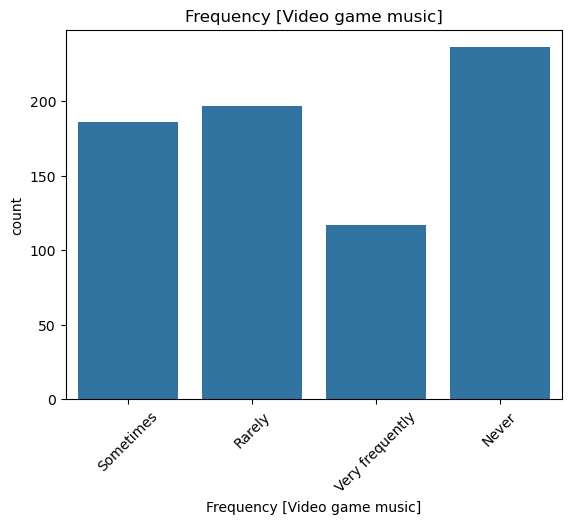

In [15]:
for col in categorical_cols:
    sns.countplot(data=data, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

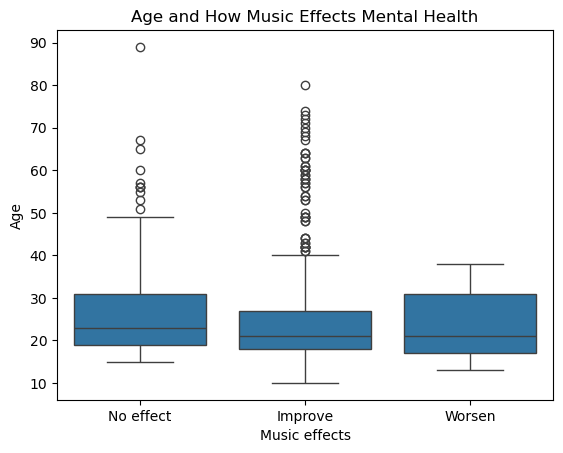

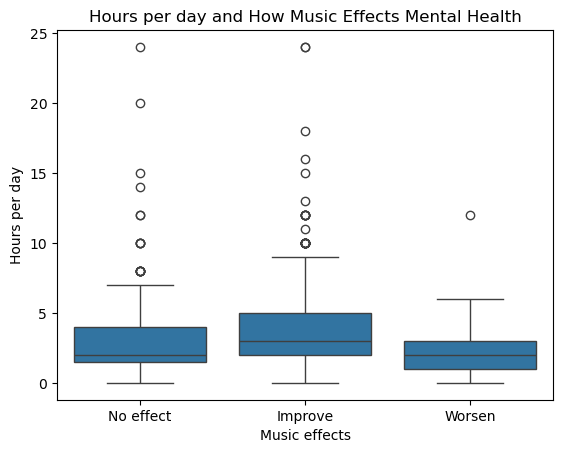

In [16]:
for col in numerical_cols:
    sns.boxplot(data=data, x=target_variable, y=col)
    plt.title(f'{col} and How Music Effects Mental Health')
    plt.show()

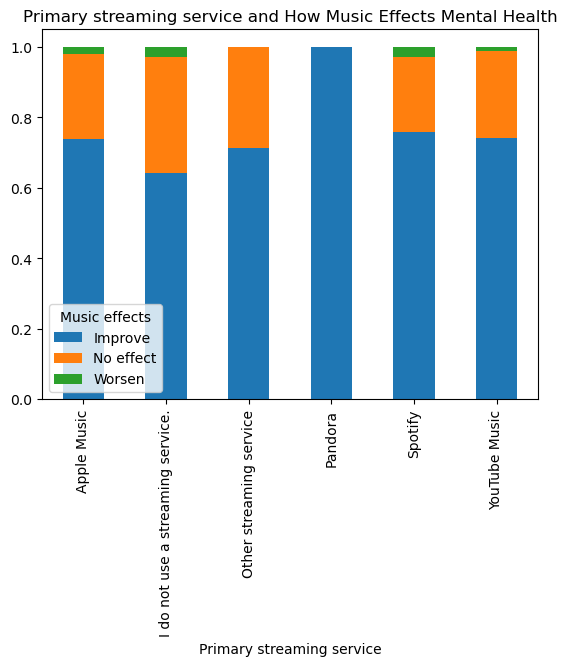

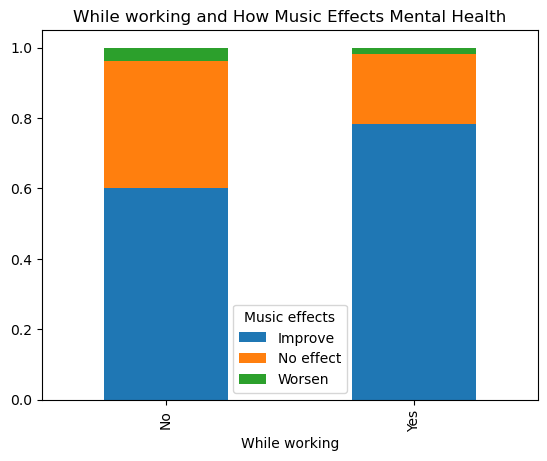

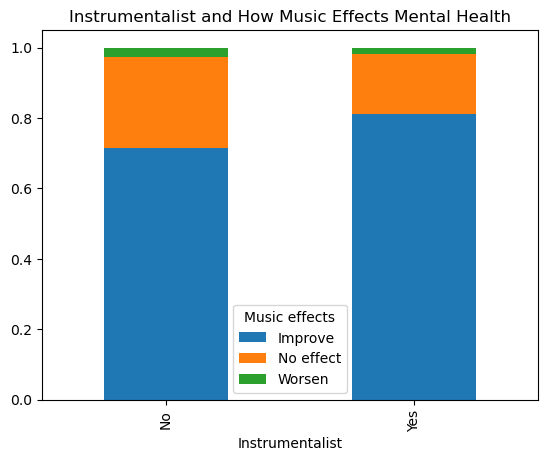

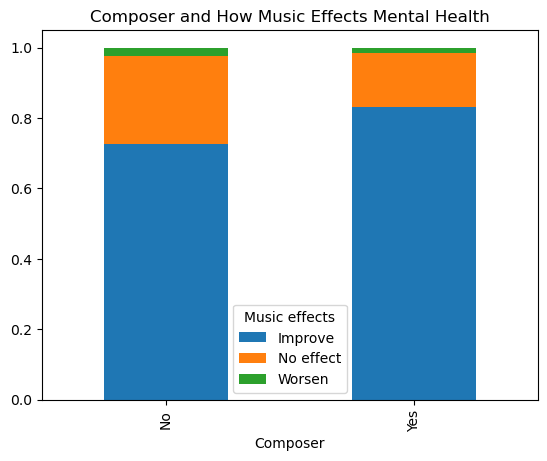

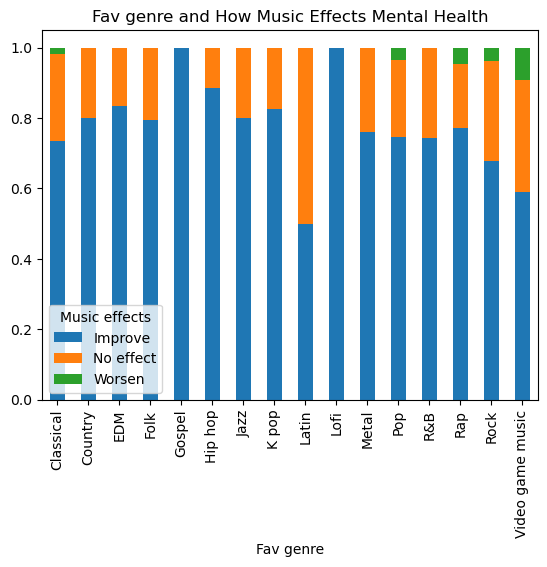

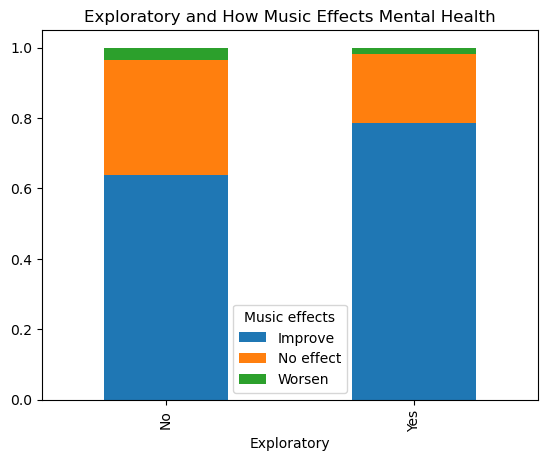

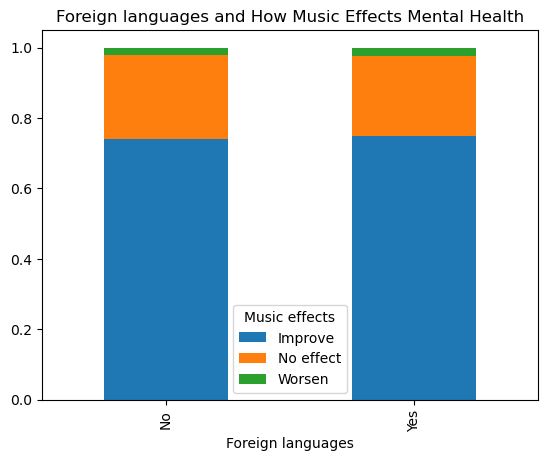

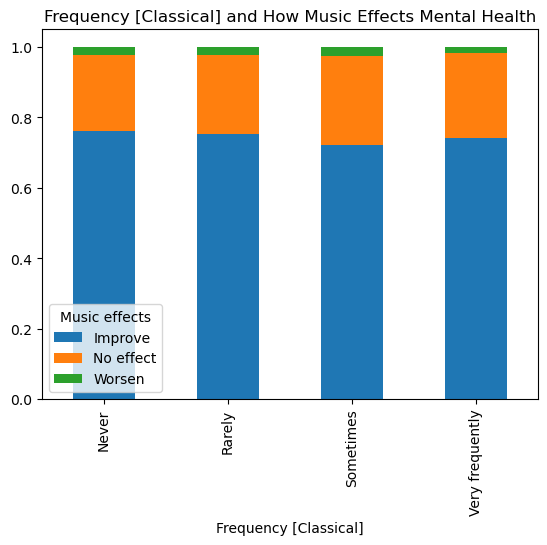

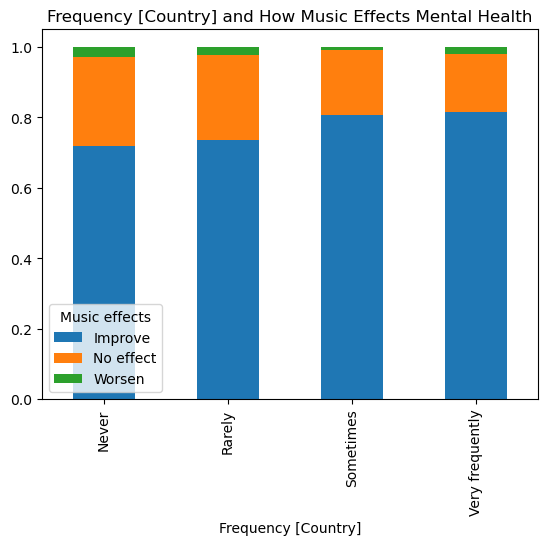

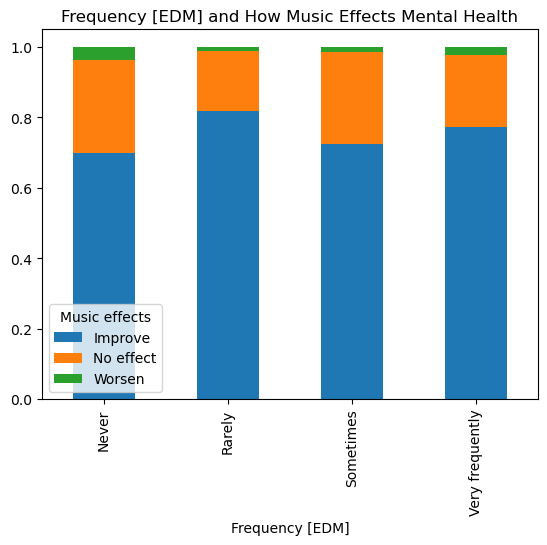

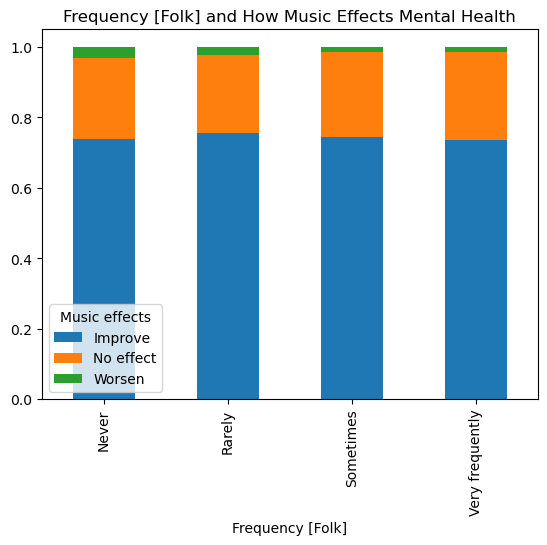

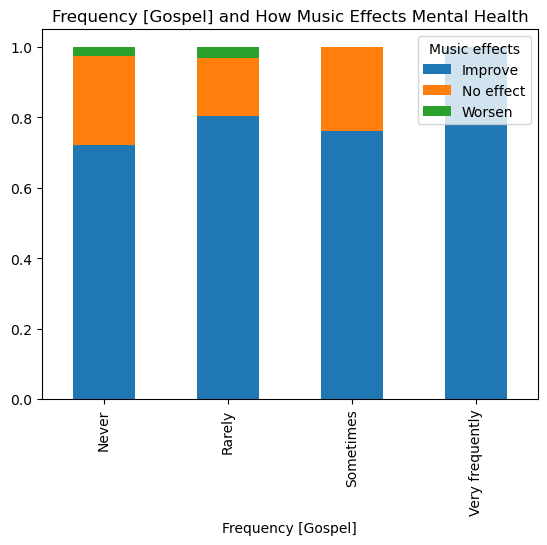

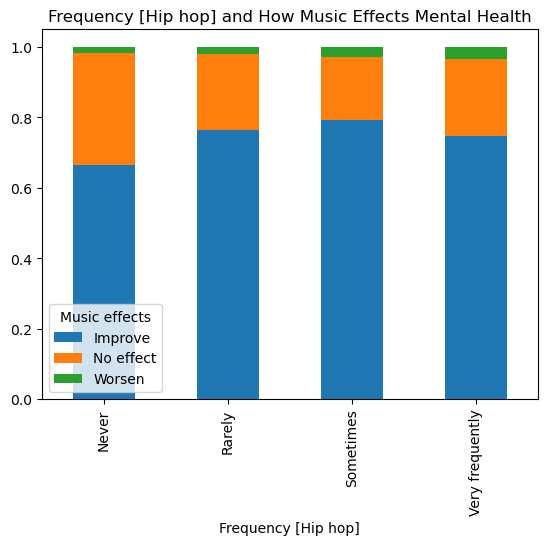

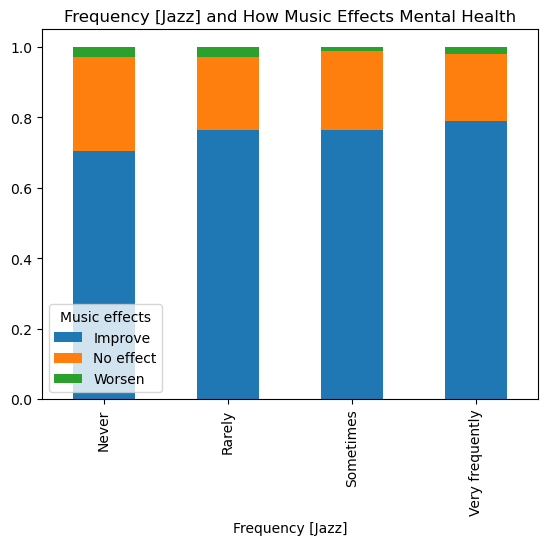

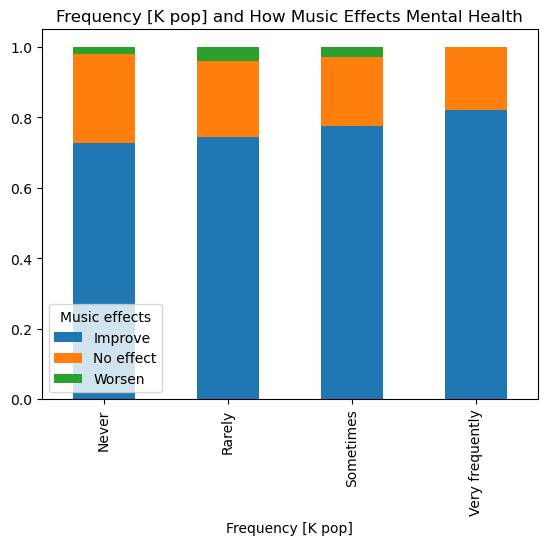

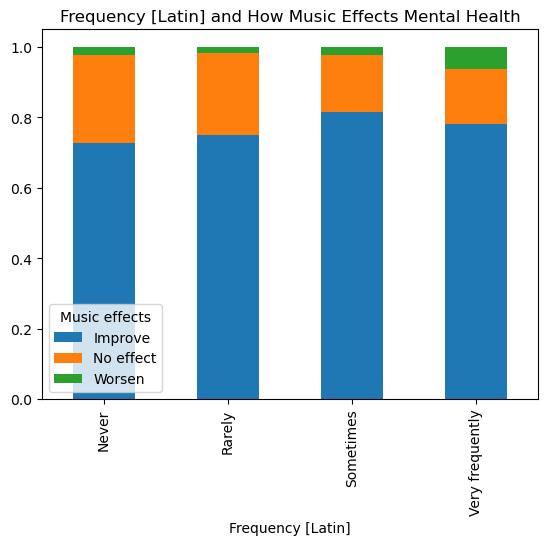

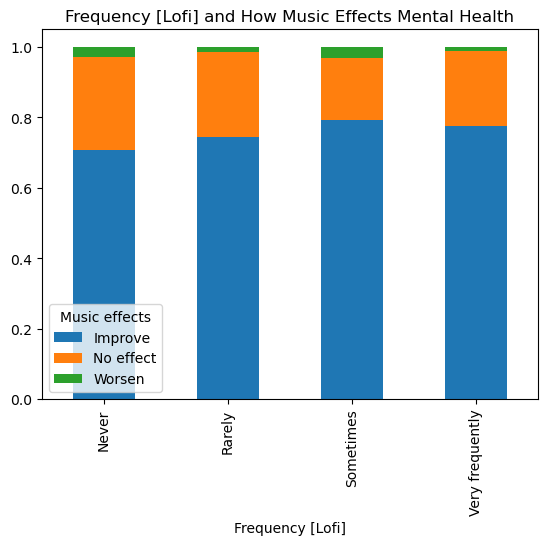

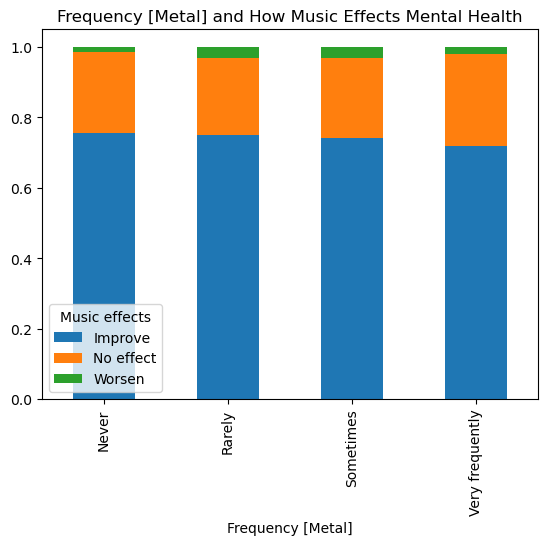

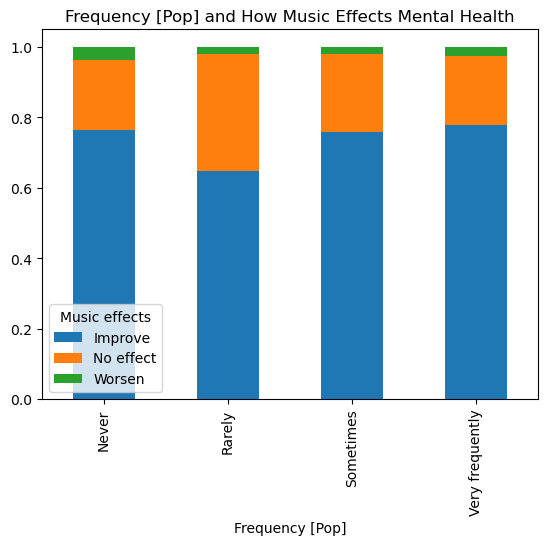

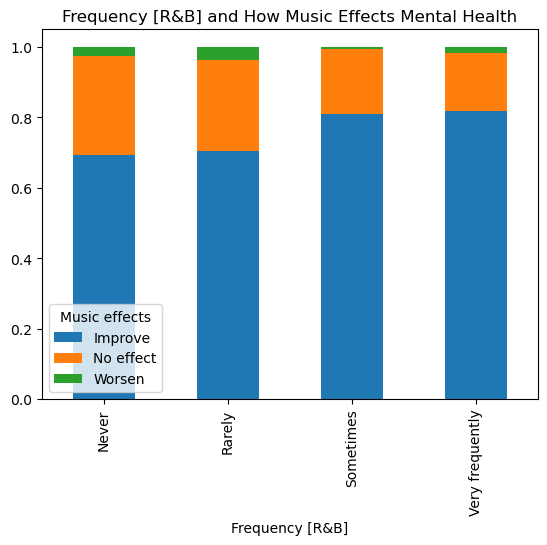

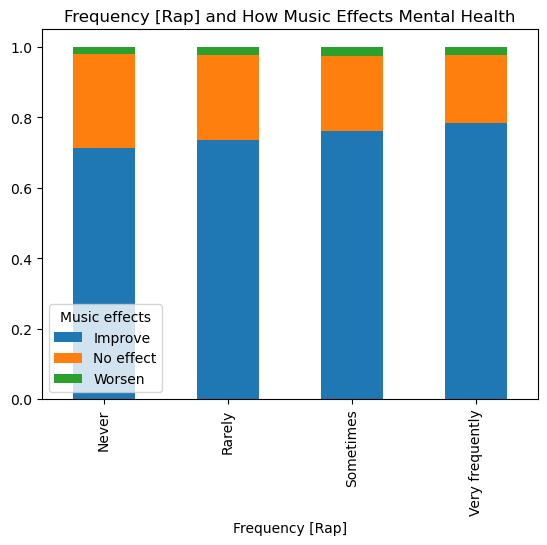

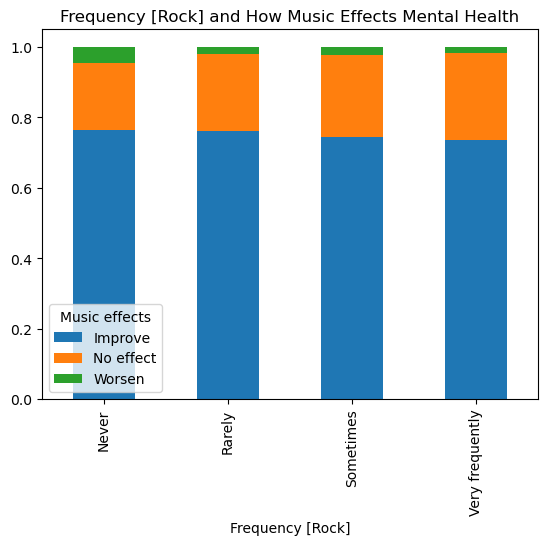

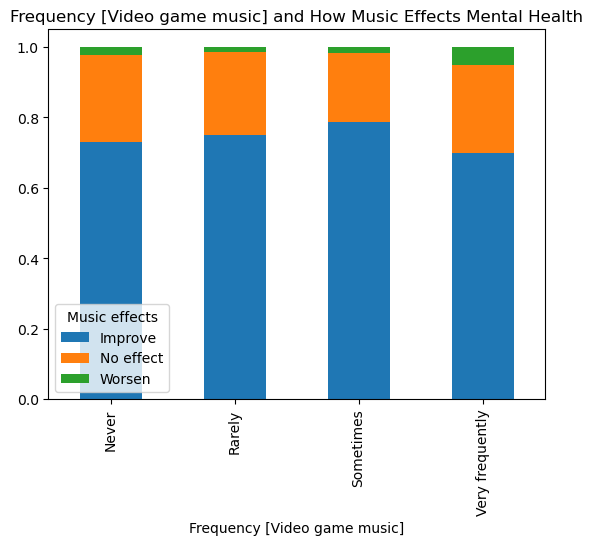

In [17]:
for col in categorical_cols:
    pd.crosstab(data[col], data[target_variable], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'{col} and How Music Effects Mental Health')
    plt.show()

# Data Preprocessing

In [19]:
data = data.drop(["Permissions"],axis=1)
data = data.drop(["Timestamp"],axis=1)
# since we are predicting mental health outcomes, we don't need any related columns
data = data.drop(["Anxiety"],axis=1)
data = data.drop(["Depression"],axis=1)
data = data.drop(["Insomnia"],axis=1)
data = data.drop(["OCD"],axis=1)

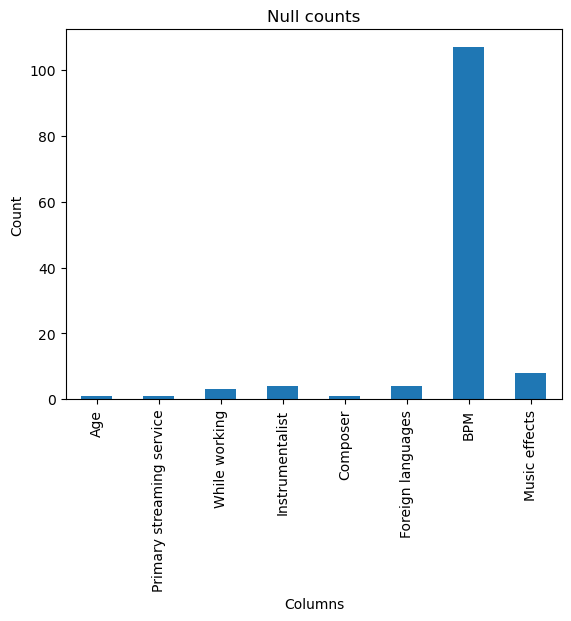

In [20]:
null_counts = data.isnull().sum()
null_counts[null_counts > 0].plot(kind='bar', title='Null counts')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [21]:
data = data.dropna(subset=[target_variable])
# convert to binary Improve vs Not Improve
data[target_variable] = data[target_variable].replace({
    'No effect': 'Not Improve',
    'Worsen': 'Not Improve'
})

le = LabelEncoder()
data[target_variable] = le.fit_transform(data[target_variable])

In [22]:
data[target_variable]

2      1
3      0
4      0
5      0
6      0
      ..
731    0
732    0
733    0
734    0
735    0
Name: Music effects, Length: 728, dtype: int64

In [23]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [24]:
# since most songs in a genre usually fall within a certain BPM range, we will replace all null BPM column with the average for that row's genre
fav_genre_bpm_mean = data.groupby('Fav genre')['BPM'].mean().round(0)
fav_genre_bpm_mean

Fav genre
Classical                115.0
Country                  110.0
EDM                      148.0
Folk                     110.0
Gospel                    89.0
Hip hop                  112.0
Jazz                     124.0
K pop                    129.0
Latin                    122.0
Lofi                     114.0
Metal                    139.0
Pop                      119.0
R&B                      114.0
Rap                      127.0
Rock                     124.0
Video game music    27027144.0
Name: BPM, dtype: float64

In [25]:
fav_genre_bpm_dict = fav_genre_bpm_mean.to_dict()
fav_genre_bpm_dict

{'Classical': 115.0,
 'Country': 110.0,
 'EDM': 148.0,
 'Folk': 110.0,
 'Gospel': 89.0,
 'Hip hop': 112.0,
 'Jazz': 124.0,
 'K pop': 129.0,
 'Latin': 122.0,
 'Lofi': 114.0,
 'Metal': 139.0,
 'Pop': 119.0,
 'R&B': 114.0,
 'Rap': 127.0,
 'Rock': 124.0,
 'Video game music': 27027144.0}

In [26]:
def fill_bpm(row):
    if pd.isnull(row['BPM']):
        return fav_genre_bpm_dict.get(row['Fav genre'], data['BPM'].mean().round())
    return row['BPM']

In [27]:
data['BPM'] = data.apply(fill_bpm, axis=1)

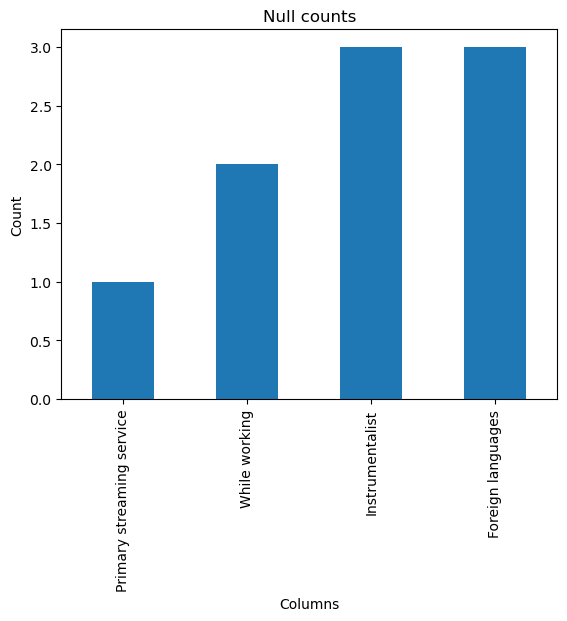

In [28]:
null_counts = data.isnull().sum()
null_counts[null_counts > 0].plot(kind='bar', title='Null counts')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [29]:
missing_val_cols = null_counts[null_counts > 0].to_dict().keys()

In [30]:
for col in missing_val_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [31]:
yes_or_no_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

for col in yes_or_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [32]:
# split categorical these columns into multiple boolean columns for each potential answer
data = pd.get_dummies(data, columns=['Primary streaming service'], prefix='Streaming Service', drop_first=False)
data = pd.get_dummies(data, columns=['Fav genre'], prefix='Fav Genre', drop_first=False)

In [33]:
data['Frequency [Pop]'].value_counts()

Frequency [Pop]
Very frequently    274
Sometimes          257
Rarely             142
Never               55
Name: count, dtype: int64

In [34]:
frequency_cols = [col for col in data.columns if col.startswith('Frequency')]
frequency_cols

['Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]']

In [35]:
frequency_value_map = {
    'Very frequently': 3,
    'Sometimes': 2,
    'Rarely': 1,
    'Never': 0
}

for col in frequency_cols:
    data[col] = data[col].map(frequency_value_map)

In [36]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Fav Genre_Jazz,Fav Genre_K pop,Fav Genre_Latin,Fav Genre_Lofi,Fav Genre_Metal,Fav Genre_Pop,Fav Genre_R&B,Fav Genre_Rap,Fav Genre_Rock,Fav Genre_Video game music
2,18.0,4.0,0,0,0,0,1,132.0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,61.0,2.5,1,0,1,1,1,84.0,2,0,...,True,False,False,False,False,False,False,False,False,False
4,18.0,4.0,1,0,0,1,0,107.0,0,0,...,False,False,False,False,False,False,True,False,False,False
5,18.0,5.0,1,1,1,1,1,86.0,1,2,...,True,False,False,False,False,False,False,False,False,False
6,18.0,3.0,1,1,0,1,1,66.0,2,0,...,False,False,False,False,False,False,False,False,False,True


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 2 to 735
Data columns (total 47 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Age                                                  728 non-null    float64
 1   Hours per day                                        728 non-null    float64
 2   While working                                        728 non-null    int64  
 3   Instrumentalist                                      728 non-null    int64  
 4   Composer                                             728 non-null    int64  
 5   Exploratory                                          728 non-null    int64  
 6   Foreign languages                                    728 non-null    int64  
 7   BPM                                                  728 non-null    float64
 8   Frequency [Classical]                                728 non-null    int64 

In [38]:
data.describe()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,7.280000e+02,728.000000,728.000000,...,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,25.143054,3.591415,0.789835,0.318681,0.171703,0.715659,0.553571,1.633624e+06,1.336538,0.818681,...,0.725275,0.603022,1.068681,1.226648,2.030220,1.255495,1.336538,2.074176,1.251374,0.255495
std,11.919787,3.038554,0.407706,0.466286,0.377382,0.451410,0.497464,3.714669e+07,0.991399,0.923532,...,0.993137,0.860467,1.030862,1.135644,0.934833,1.061051,1.054595,1.033147,1.071706,0.436439
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.040000e+02,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,21.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.200000e+02,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,28.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.400000e+02,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,89.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+09,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000


In [39]:
null_counts = data.isnull().sum()
print("Null counts")
null_counts[null_counts > 0]

Null counts


Series([], dtype: int64)

## Heatmap

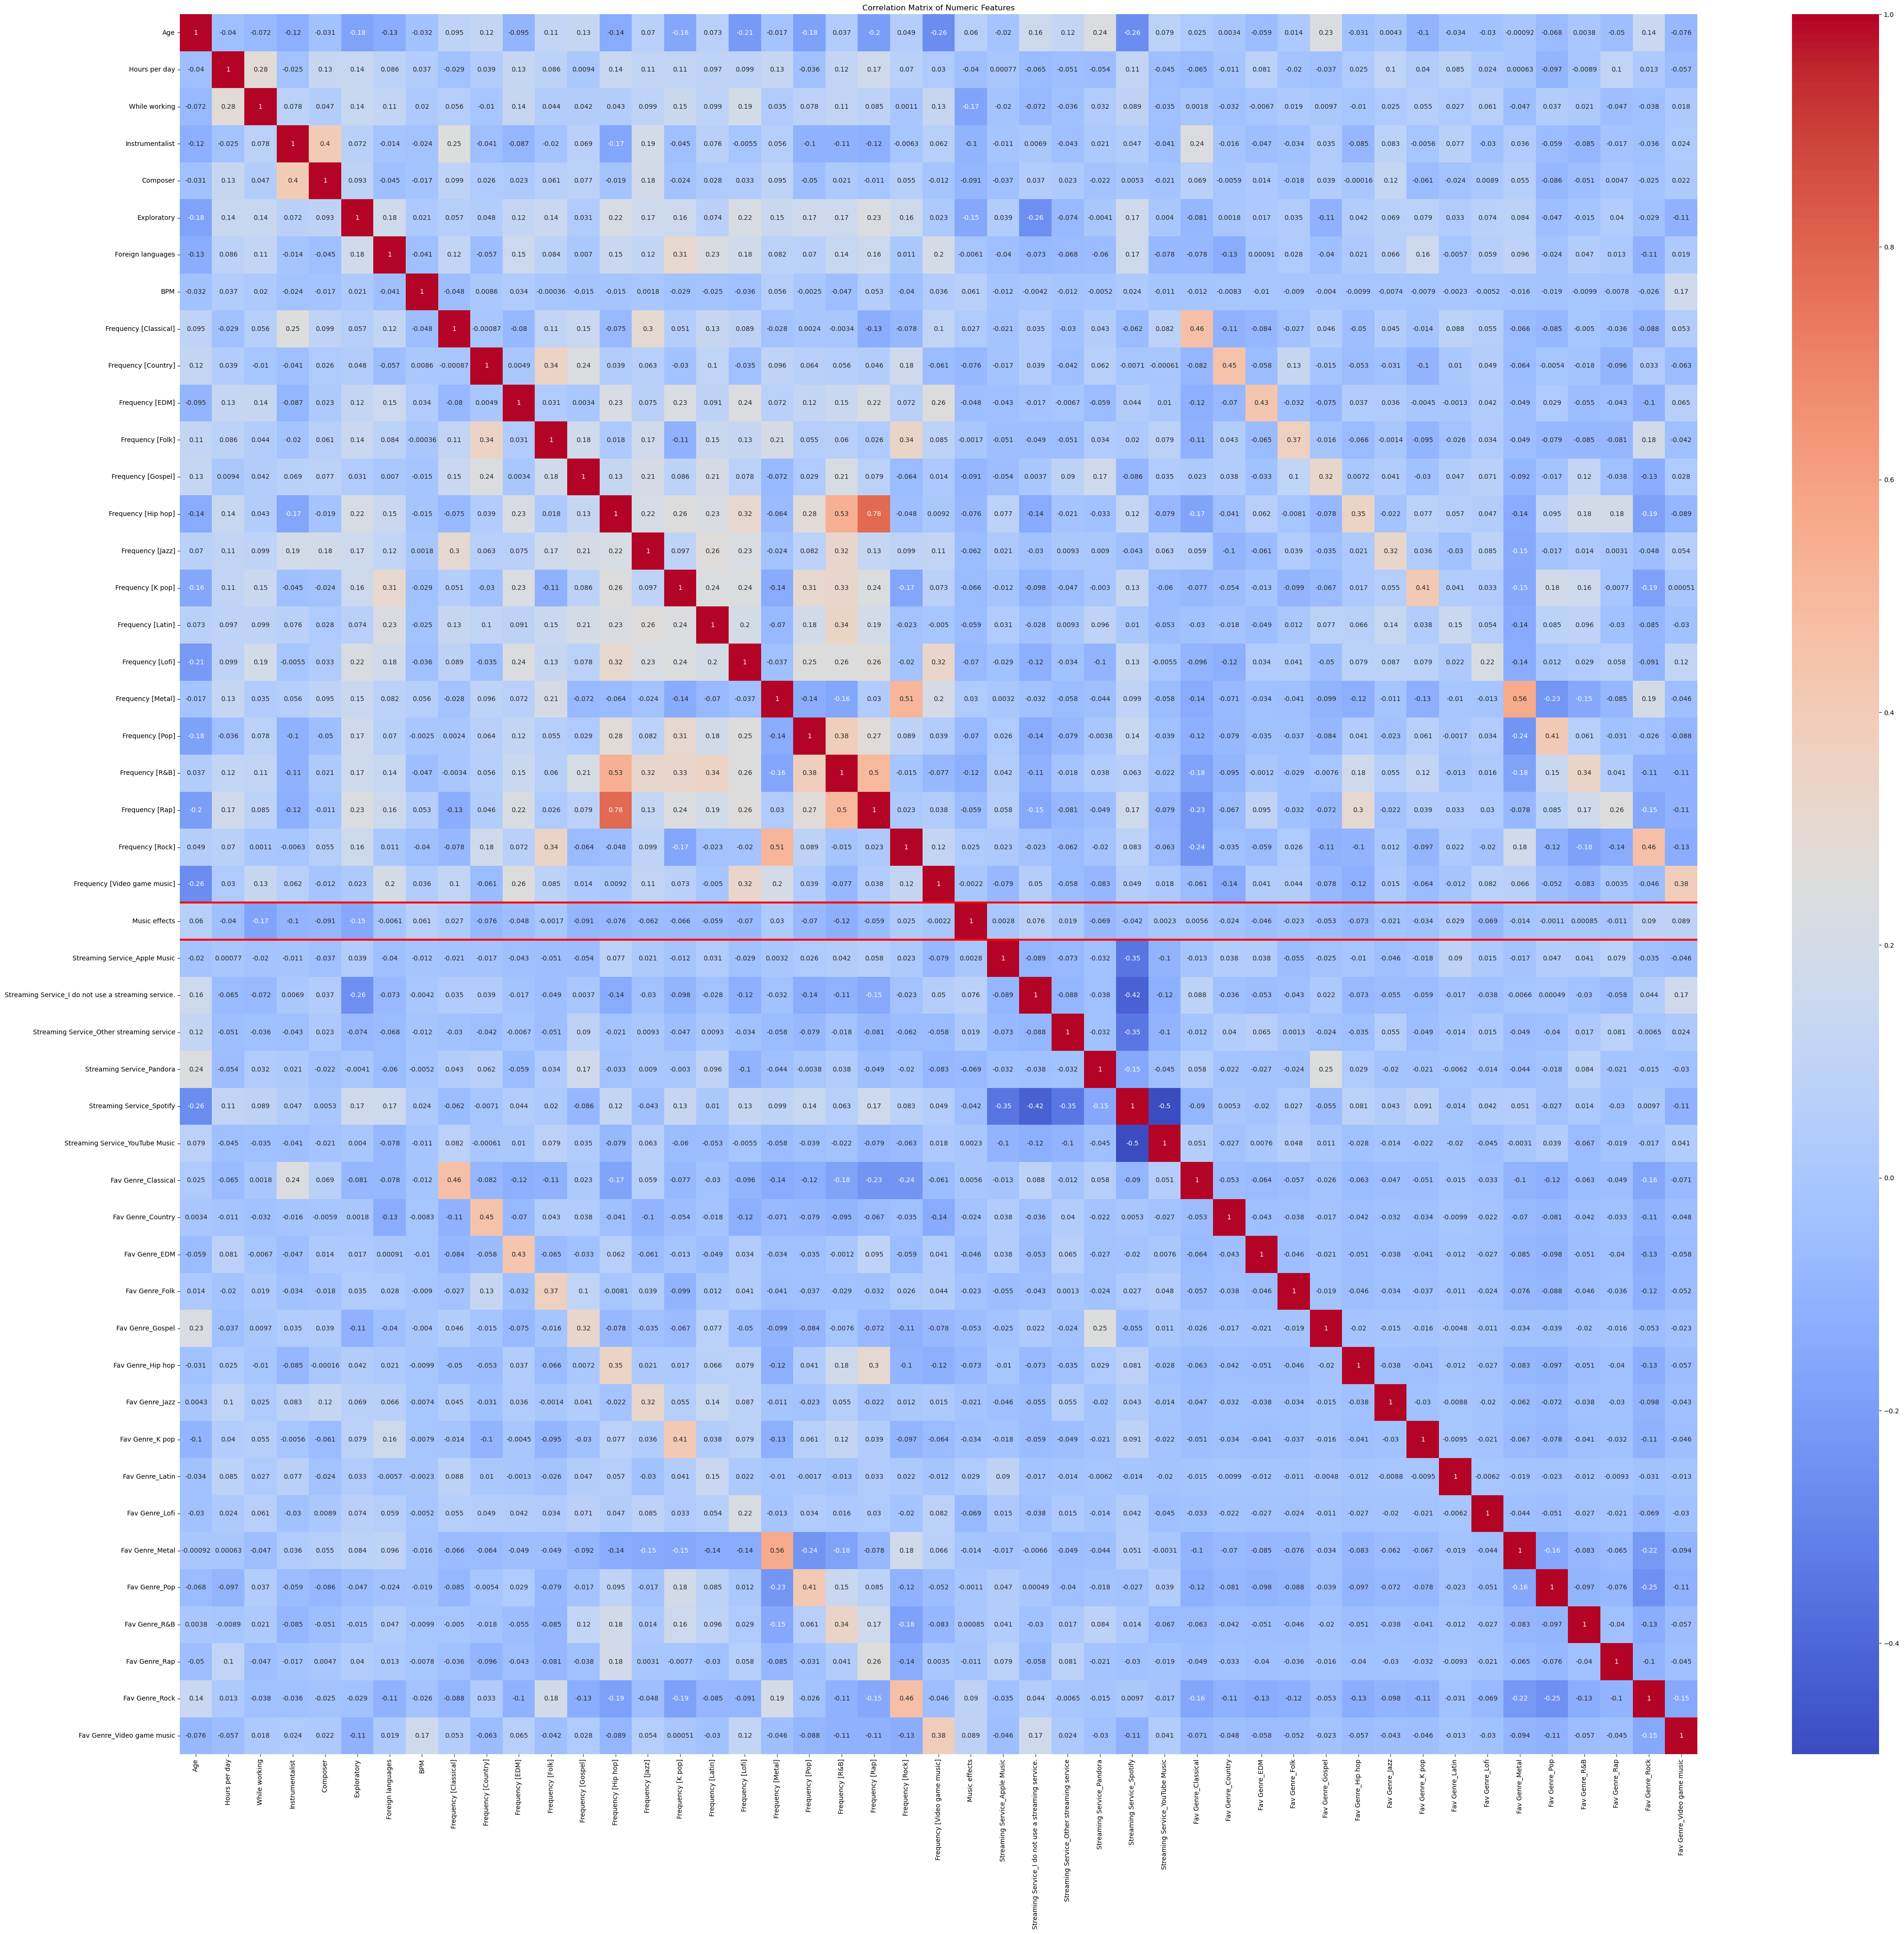

In [41]:
col_idx = data.columns.get_loc(target_variable)

plt.figure(figsize=(52,48))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.axhline(y=col_idx, color='red', linewidth=3)
plt.axhline(y=col_idx + 1, color='red', linewidth=3)

plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [42]:
data.corr()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Fav Genre_Jazz,Fav Genre_K pop,Fav Genre_Latin,Fav Genre_Lofi,Fav Genre_Metal,Fav Genre_Pop,Fav Genre_R&B,Fav Genre_Rap,Fav Genre_Rock,Fav Genre_Video game music
Age,1.000000,-0.040076,-0.071925,-0.122303,-0.030848,-0.179813,-0.130022,-0.031678,0.094743,0.120422,...,0.004331,-0.103699,-0.033678,-0.030149,-0.000916,-0.068321,0.003770,-0.049947,0.141826,-0.075634
Hours per day,-0.040076,1.000000,0.282342,-0.024619,0.132638,0.139266,0.085776,0.036882,-0.029016,0.038854,...,0.101492,0.039822,0.084847,0.023653,0.000632,-0.096995,-0.008880,0.100386,0.013170,-0.056518
While working,-0.071925,0.282342,1.000000,0.077841,0.047119,0.138236,0.113235,0.020244,0.056118,-0.010016,...,0.024819,0.054621,0.027074,0.060876,-0.046598,0.036726,0.021367,-0.046801,-0.037951,0.017646
Instrumentalist,-0.122303,-0.024619,0.077841,1.000000,0.399949,0.071669,-0.014401,-0.023657,0.249716,-0.041314,...,0.083436,-0.005556,0.076744,-0.030058,0.035775,-0.059456,-0.084799,-0.017409,-0.035653,0.024469
Composer,-0.030848,0.132638,0.047119,0.399949,1.000000,0.093200,-0.045401,-0.017383,0.099018,0.026304,...,0.124029,-0.061413,-0.023897,0.008855,0.054639,-0.085936,-0.051242,0.004735,-0.024527,0.022088
Exploratory,-0.179813,0.139266,0.138236,0.071669,0.093200,1.000000,0.181246,0.021086,0.057364,0.047733,...,0.068683,0.079033,0.033084,0.074388,0.084275,-0.046798,-0.014918,0.040119,-0.028714,-0.108475
Foreign languages,-0.130022,0.085776,0.113235,-0.014401,-0.045401,0.181246,1.000000,-0.040954,0.115397,-0.056672,...,0.066411,0.162203,-0.005656,0.058501,0.095661,-0.023624,0.046821,0.013258,-0.107477,0.019049
BPM,-0.031678,0.036882,0.020244,-0.023657,-0.017383,0.021086,-0.040954,1.000000,-0.048261,0.008645,...,-0.007396,-0.007948,-0.002310,-0.005193,-0.016317,-0.018961,-0.009889,-0.007768,-0.025778,0.173500
Frequency [Classical],0.094743,-0.029016,0.056118,0.249716,0.099018,0.057364,0.115397,-0.048261,1.000000,-0.000867,...,0.044696,-0.013795,0.088127,0.055208,-0.066416,-0.085328,-0.005048,-0.035667,-0.087729,0.053484
Frequency [Country],0.120422,0.038854,-0.010016,-0.041314,0.026304,0.047733,-0.056672,0.008645,-0.000867,1.000000,...,-0.030719,-0.100661,0.010312,0.048761,-0.064122,-0.005446,-0.018464,-0.095732,0.033189,-0.062596


# Modeling

In [44]:
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# feature engineering
# fav_genre_cols = [
#     'Fav Genre_Latin', 
#     'Frequency [Classical]', 
#     'Frequency [Rap]', 
#     'Fav Genre_Rock', 
#     'Fav Genre_Video game music', 
#     'Streaming Service_Apple Music',
#     'BPM',
#     'Fav Genre_Lofi',
#     'Streaming Service_Pandora',
#     'Fav Genre_Gospel',
#     'Frequency [R&B]',
#     'While working'
# ]
fav_genre_cols = [col for col in data.columns if col.startswith('Fav Genre_')]
fav_genre_cols += ['Frequency [Classical]', 'Age', 'BPM', 'Frequency [Rap]', 'Streaming Service_Pandora', 'While working']

X_avec_features = data[fav_genre_cols]

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_avec_features_scaled = scaler.fit_transform(X_avec_features)

In [46]:
# Improve has 542 rows while No Improve has 186, so we need to balance the data counts to get better predictions
# use SMOTE to sythentically add data that does not improve the mental condition
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_avec_features_resampled, y_avec_features_resampled = smote.fit_resample(X_avec_features_scaled, y)

## Split the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

X_avec_features_train, X_avec_features_test, y_avec_features_train, y_avec_features_test = train_test_split(X_avec_features_resampled, y_avec_features_resampled, test_size=0.2, random_state=1)

## Set up models

In [50]:
# complicated set of variables, so first try decision tree classification
decision_tree_classifer_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifer_features_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# try naive bayes classification
naive_bayes_model = GaussianNB()
naive_bayes_features_model = GaussianNB()

## Train models

In [52]:
decision_tree_classifer_model.fit(X_train, y_train)
decision_tree_classifer_features_model.fit(X_avec_features_train, y_avec_features_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
naive_bayes_model.fit(X_train, y_train)
naive_bayes_features_model.fit(X_avec_features_train, y_avec_features_train)

GaussianNB()

# Evaluation

In [55]:
decision_tree_y_pred = decision_tree_classifer_model.predict(X_test)
decision_tree_features_y_pred = decision_tree_classifer_features_model.predict(X_avec_features_test)

naive_bayes_y_pred = naive_bayes_model.predict(X_test)
naive_bayes_features_y_pred = naive_bayes_features_model.predict(X_avec_features_test)

## Accuracy

### Decision Tree Classification

In [58]:
accuracy_score(y_test, decision_tree_y_pred)

0.7649769585253456

#### Feature

In [60]:
accuracy_score(y_avec_features_test, decision_tree_features_y_pred)

0.7557603686635944

### Naive Bayes Classification

In [62]:
accuracy_score(y_test, naive_bayes_y_pred)

0.5391705069124424

#### Feature

In [64]:
accuracy_score(y_avec_features_test, naive_bayes_features_y_pred)

0.4792626728110599

## Precision

### Decision Tree Classification

In [67]:
precision_score(y_test, decision_tree_y_pred)

0.7653061224489796

#### Feature

In [69]:
precision_score(y_avec_features_test, decision_tree_features_y_pred)

0.7358490566037735

### Naive Bayes Classification

In [71]:
precision_score(y_test, naive_bayes_y_pred)

0.507537688442211

#### Feature

In [73]:
precision_score(y_avec_features_test, naive_bayes_features_y_pred)

0.47641509433962265

## Sensitivity / Recall

### Decision Tree Classification

In [76]:
recall_score(y_test, decision_tree_y_pred, pos_label=0)

0.7982456140350878

#### Feature

In [78]:
recall_score(y_avec_features_test, decision_tree_features_y_pred, pos_label=0)

0.7543859649122807

### Naive Bayes Classification

In [80]:
recall_score(y_test, naive_bayes_y_pred, pos_label=0)

0.14035087719298245

#### Feature

In [82]:
recall_score(y_avec_features_test, naive_bayes_features_y_pred, pos_label=0)

0.02631578947368421

## Specificity

### Decision Tree Classification

In [85]:
recall_score(y_test, decision_tree_y_pred, pos_label=1)

0.7281553398058253

#### Feature

In [87]:
recall_score(y_avec_features_test, decision_tree_features_y_pred, pos_label=1)

0.7572815533980582

### Naive Bayes Classification

In [89]:
recall_score(y_test, naive_bayes_y_pred, pos_label=1)

0.9805825242718447

#### Feature

In [91]:
recall_score(y_avec_features_test, naive_bayes_features_y_pred, pos_label=1)

0.9805825242718447

## F1 Score

### Decision Tree Classification

In [94]:
f1_score(y_test, decision_tree_y_pred)

0.746268656716418

#### Feature

In [96]:
f1_score(y_avec_features_test, decision_tree_features_y_pred)

0.7464114832535885

### Naive Bayes Classification

In [98]:
f1_score(y_test, naive_bayes_y_pred)

0.6688741721854304

#### Feature

In [100]:
f1_score(y_avec_features_test, naive_bayes_features_y_pred)

0.6412698412698413

## Confusion Matrix

In [102]:
labels = ['Improve', 'Not Improve']

### Decision Tree Classification

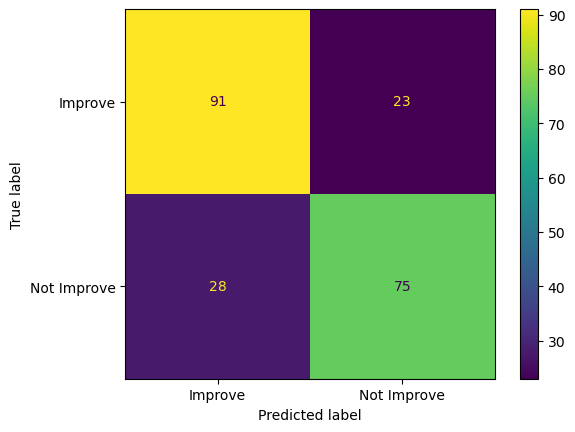

In [104]:
cm = confusion_matrix(y_test, decision_tree_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.show()

#### Feature

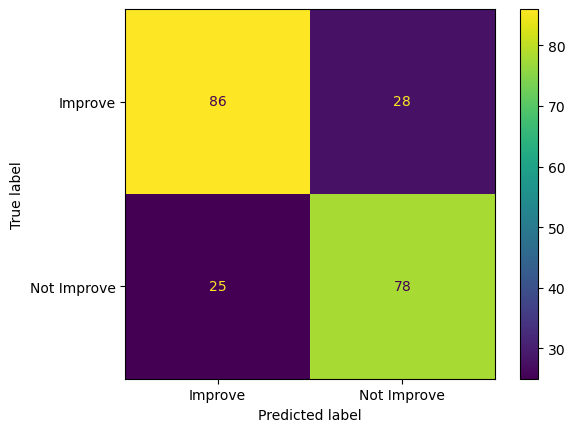

In [106]:
cm = confusion_matrix(y_avec_features_test, decision_tree_features_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.show()

### Naive Bayes Classification

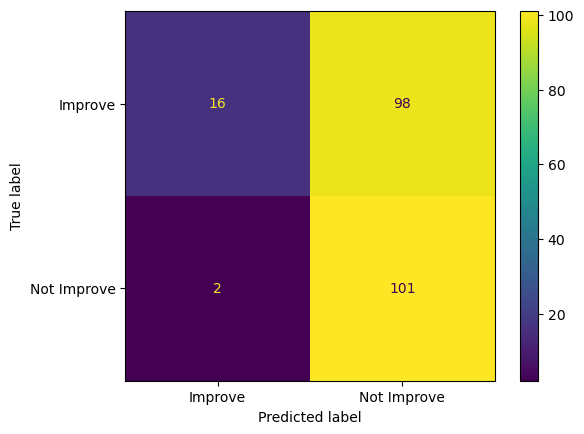

In [108]:
cm = confusion_matrix(y_test, naive_bayes_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.show()

#### Feature

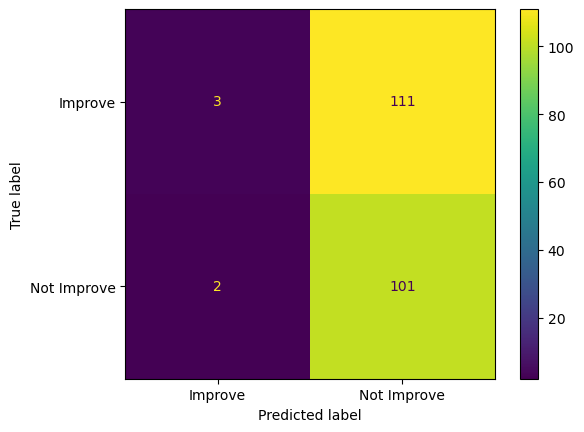

In [110]:
cm = confusion_matrix(y_avec_features_test, naive_bayes_features_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.show()

## Classification Report

### Decision Tree Classification

In [113]:
print(classification_report(y_test, decision_tree_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       114
           1       0.77      0.73      0.75       103

    accuracy                           0.76       217
   macro avg       0.77      0.76      0.76       217
weighted avg       0.76      0.76      0.76       217



#### Feature

In [115]:
print(classification_report(y_avec_features_test, decision_tree_features_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       114
           1       0.74      0.76      0.75       103

    accuracy                           0.76       217
   macro avg       0.76      0.76      0.76       217
weighted avg       0.76      0.76      0.76       217



### Naive Bayes Classification

In [117]:
print(classification_report(y_test, naive_bayes_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.14      0.24       114
           1       0.51      0.98      0.67       103

    accuracy                           0.54       217
   macro avg       0.70      0.56      0.46       217
weighted avg       0.71      0.54      0.44       217



#### Feature

In [119]:
print(classification_report(y_avec_features_test, naive_bayes_features_y_pred))

              precision    recall  f1-score   support

           0       0.60      0.03      0.05       114
           1       0.48      0.98      0.64       103

    accuracy                           0.48       217
   macro avg       0.54      0.50      0.35       217
weighted avg       0.54      0.48      0.33       217



## ROC AUC

### Decision Tree Classification

In [122]:
decision_tree_y_pred_prob = decision_tree_classifer_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, decision_tree_y_pred_prob)

0.7632004769204566

#### Feature

In [124]:
tree_features_y_pred_prob = decision_tree_classifer_features_model.predict_proba(X_avec_features_test)[:, 1]
roc_auc_score(y_avec_features_test, tree_features_y_pred_prob)

0.7558337591551695

### Naive Bayes Classification

In [126]:
naive_bayes_y_pred_prob = naive_bayes_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, naive_bayes_y_pred_prob)

0.6548714018054845

#### Feature

In [128]:
naive_bayes_features_y_pred_prob = naive_bayes_features_model.predict_proba(X_avec_features_test)[:, 1]
roc_auc_score(y_avec_features_test, naive_bayes_features_y_pred_prob)

0.618548799182422

## Histplot Results

In [130]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Improve': 0, 'Not Improve': 1}


### Decision Tree Classification

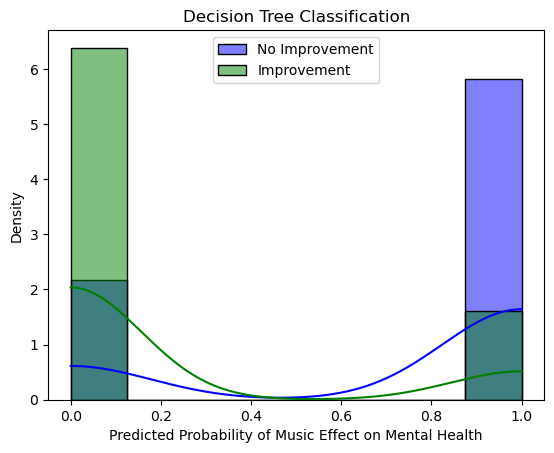

In [132]:
sns.histplot(decision_tree_y_pred_prob[y_test == 1], color="blue", label="No Improvement", kde=True, stat='density')
sns.histplot(decision_tree_y_pred_prob[y_test == 0], color="green", label="Improvement", kde=True, stat='density')
plt.title("Decision Tree Classification")
plt.xlabel("Predicted Probability of Music Effect on Mental Health")
plt.legend()
plt.show()

#### Feature

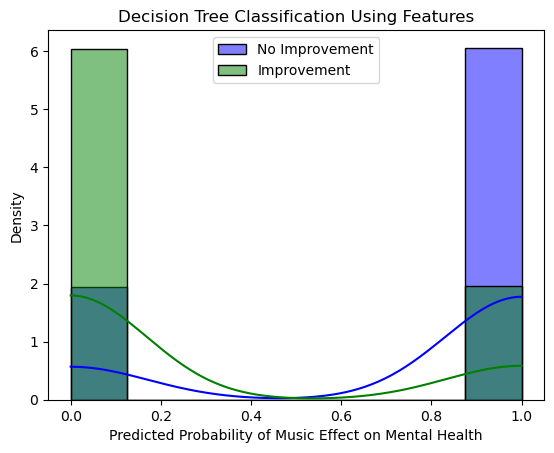

In [134]:
sns.histplot(tree_features_y_pred_prob[y_avec_features_test == 1], color="blue", label="No Improvement", kde=True, stat='density')
sns.histplot(tree_features_y_pred_prob[y_avec_features_test == 0], color="green", label="Improvement", kde=True, stat='density')
plt.title("Decision Tree Classification Using Features")
plt.xlabel("Predicted Probability of Music Effect on Mental Health")
plt.legend()
plt.show()

### Naive Bayes Classification

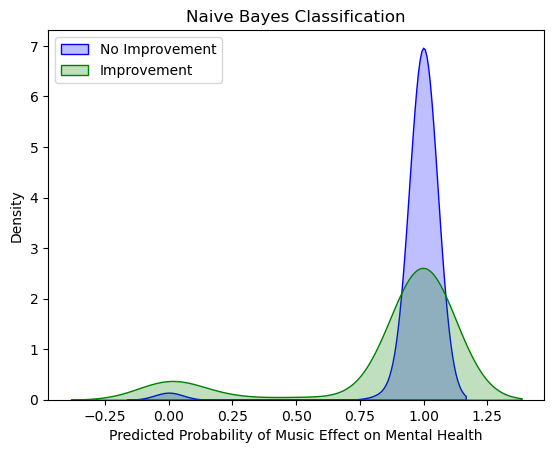

In [136]:
# histplot was not performing well - kernel kept freezing
sns.kdeplot(naive_bayes_y_pred_prob[y_test == 1], color="blue", label="No Improvement", fill=True)
sns.kdeplot(naive_bayes_y_pred_prob[y_test == 0], color="green", label="Improvement", fill=True)
plt.title("Naive Bayes Classification")
plt.xlabel("Predicted Probability of Music Effect on Mental Health")
plt.legend()
plt.show()

#### Feature

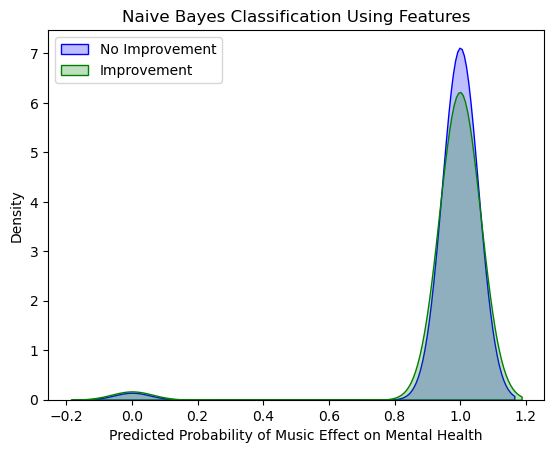

In [138]:
sns.kdeplot(naive_bayes_features_y_pred_prob[y_avec_features_test == 1], color="blue", label="No Improvement", fill=True)
sns.kdeplot(naive_bayes_features_y_pred_prob[y_avec_features_test == 0], color="green", label="Improvement", fill=True)
plt.title("Naive Bayes Classification Using Features")
plt.xlabel("Predicted Probability of Music Effect on Mental Health")
plt.legend()
plt.show()